In [1]:
#Importing necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

2.a) Size and Number of channels of the image CinqueTerre.jpg: 

The image is of shape 315 * 474 with 3 channels( Blue, Green and Red Channels) and has size of 447930 pixels.

In [2]:
img = cv2.imread('CinqueTerre.jpg')
print ("Image shape:\t\t",img.shape)
print ("Image Size:\t\t",img.size)
print ("Number of channels:\t", img.shape[2])

Image shape:		 (315, 474, 3)
Image Size:		 447930
Number of channels:	 3


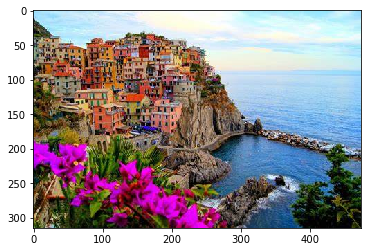

In [3]:
# Displaying the image in jupyter notebook

#One thing we have to be careful while plotting in notebook is that while matplotlib module uses images in RGB format,
#opencv uses the BGR format. So we are going to explicitly convert the format (reorder to RGB) before displaying the image

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

2.b) Sum of Squared Differences(SSD) between top-left and bottom-right 50 * 50 subimages.

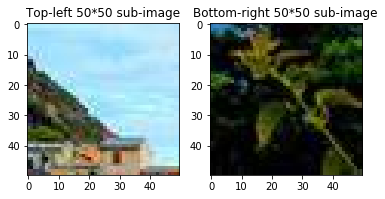

In [4]:
topleft = img[0:50,0:50]
bottomright = img[-50:,-50:]

fig, axs = plt.subplots(1,2)
axs[0].imshow(cv2.cvtColor(topleft, cv2.COLOR_BGR2RGB))
axs[0].set_title('Top-left 50*50 sub-image')

axs[1].imshow(cv2.cvtColor(bottomright, cv2.COLOR_BGR2RGB))
axs[1].set_title('Bottom-right 50*50 sub-image')

plt.show()

In [5]:
def ssd(img1,img2):
    #Since we will be squaring intensity values we should change the datatype from unsigned 8 bit integers as there will
    #be overflow otherwise.
    img1 = img1.astype(np.int32)
    img2 = img2.astype(np.int32)
    
    return np.sum(np.power((img1-img2),2))

SSD = ssd(topleft, bottomright)
print ("Sum of Squared Differences (SSD) between top left and bottom right subimages = %.4f" %(SSD)) 
                            

Sum of Squared Differences (SSD) between top left and bottom right subimages = 206008236.0000


3) Best alignment for green and red channels of monastery.jpg over red channel

In [6]:
#Reading image monastery.jpg
img = cv2.imread('monastery.jpg',0)
print (img.shape)

(1024, 391)


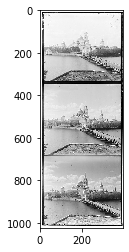

In [7]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

The 3 channels of the image are given together in the whole image shown above. The first part (top part of the image) is the blue channel followed by the green channel part and then the red channel part. We can see the intensity values are different for the same monastery location for the 3 channels.

In [8]:
#Splitting images into blue, green and red channels
equal_height = img.shape[0]//3

b = img[0:equal_height,:]
g = img[equal_height:2*equal_height,]
r = img[(2*equal_height+1):,]

print (b.shape, g.shape, r.shape)

(341, 391) (341, 391) (341, 391)


In [9]:
#Best alignments with blue channel as reference channel and possible displacements = [-10,10]

#Finding best alignment for a channel based on a reference channel over possible window of [-10,10]
def find_alignment(channel, ref_channel):
    best_score = np.inf
    disp_vector = (0,0)
    for displacement_i in range(-10,10): #find best shift for x-axis
        for displacement_j in range(-10,10): #find best shift for y-axis
            #shifting image by displacement vector (displacement_i, displacement_j)
            t = np.roll(channel, displacement_i, axis = 0)  #shifting image by displacement_i in x axis
            t = np.roll(t, displacement_j, axis = 1)        #shifting image by displacement_j in y axis
            score = ssd(ref_channel,t)
            
            if score < best_score:
                best_score = score
                disp_vector = (displacement_i, displacement_j)
    return (best_score, disp_vector)


In [10]:
#finding best alignment for green channel over blue channel
green_ssd, green_disp = find_alignment(g, b)
print ("Displacement vector for green channel= ", green_disp)
print ("Best SSD score for green channel=", green_ssd)

Displacement vector for green channel=  (-6, 0)
Best SSD score for green channel= 286526389


In [11]:
#finding best alignment for red channel over blue channel
red_ssd, red_disp = find_alignment(r,b)
print ("Displacement vector for red channel= ", red_disp)
print ("Best SSD score for red channel=", red_ssd)

Displacement vector for red channel=  (9, 1)
Best SSD score for red channel= 545991874


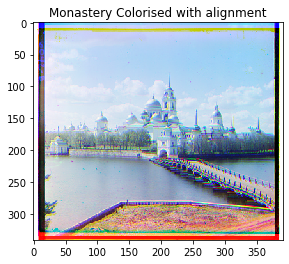

In [12]:
#Displacing the channels with respect to their best displacement vectors
g_aligned = np.roll(g, green_disp[0], axis = 0)
g_aligned = np.roll(g_aligned, green_disp[1], axis = 1)

r_aligned = np.roll(r, red_disp[0], axis = 0)
r_aligned = np.roll(r, red_disp[1], axis = 1)

#Merging the channels together to form the color image
img_rgb = cv2.merge((b, g_aligned, r_aligned))

#Displaying the colored image
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.title("Monastery Colorised with alignment")
plt.show()

### 5) My 3 favourite illusions:

**i) Rotating Snake Illusion**: Here, the image is fixed but we get the illusion that the snakes are rotating. If we fix our gaze towards a centre of a circle, then the motion will stop. This illusion is due to "jerky eye motions" which are caused as the image triggers the motion sensitive neurons in our visual cortex. As we look into the image, our visual neurons perceive the image as to what would happen if the snakes were really in motion and hence, we feel that the snakes are rotating in the image.

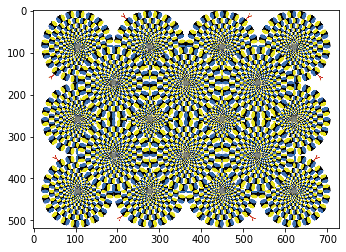

In [13]:
img = cv2.imread('rotating_snake.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

**ii) Coffer Illusion:** In this image, there are 16 circles which we are unable to find initially as we only see edges and rectanges from the image. This is because our brain inherently removes redundant features from objects and scenes. As corners and angles tend to describe the images more effectively, our brain inherently gets pre-occupied with those features and fails to notice the circles initially.

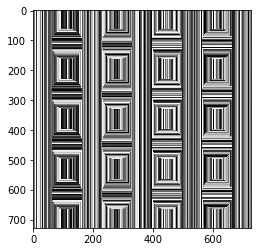

In [14]:
img = cv2.imread('coffer_illusion.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

**iii) "Age is all in your head":** This picture shows 3 different images of the same person taken using different angles which create an illusion of age for the persons. In the leftmost image, the top part of the person's head expands and the bottom part narrows which creates an illusion of age regression. In the rightmost image, the top part of the person's head narrows while the bottom part expands causing the illusion of age progression. These effects are caused as different amount of lights are reflected from the person's face from different angles causing 2 opposite vanishing points which lead to the illusion of expansion and contraction of respective parts of the face.

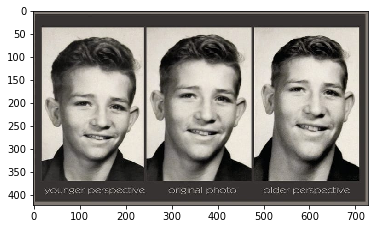

In [15]:
img = cv2.imread('age_in_your_head.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()